# LOADING THE DATA

In [294]:
import numpy as np
import pandas as pd
from google.colab import drive

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
import datetime
from sklearn.cluster import KMeans
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
from sklearn.impute import KNNImputer

RANDOM_SEED = 6    

drive.mount('/content/drive/')
sns.set()



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/train.csv',index_col="tripid")
test  = pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/test.csv',index_col="tripid")
sub =  pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/sample_submission.csv',index_col="tripid")

In [296]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct


In [297]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79


In [298]:
print(sub.info())
print(train.info())
print(train['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  8576 non-null   int64
dtypes: int64(1)
memory usage: 134.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 

In [299]:
cleanup_label = {"label":     {'correct': '1' , 'incorrect': '0'}}
train.replace(cleanup_label, inplace=True)
convert_dict = {'label': 'int64'}
train = train.astype(convert_dict) 
print(train['label'].value_counts())

train

1    15495
0     1681
Name: label, dtype: int64


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,1
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,1
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1


## create entire dataset

In [300]:
frames = [train, test]
dataset = pd.concat(frames)
dataset

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.00000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1.0
189125358,10.5,791.0,47.0,0.00000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1.0
189125719,10.5,1087.0,80.0,0.00000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1.0
189127273,10.5,598.0,271.0,15.66380,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1.0
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723.0,429.0,24.83332,3.0,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48,NaN
222857785,10.5,1378.0,80.0,0.00000,125.0,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85,NaN
222858416,10.5,418.0,56.0,3.28440,93.0,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79,NaN


In [301]:
dataset = dataset.drop_duplicates(keep='first')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25748 entries, 189123628 to 222860703
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            25547 non-null  float64
 1   duration                   25547 non-null  float64
 2   meter_waiting              25547 non-null  float64
 3   meter_waiting_fare         25547 non-null  float64
 4   meter_waiting_till_pickup  25547 non-null  float64
 5   pickup_time                25748 non-null  object 
 6   drop_time                  25748 non-null  object 
 7   pick_lat                   25748 non-null  float64
 8   pick_lon                   25748 non-null  float64
 9   drop_lat                   25748 non-null  float64
 10  drop_lon                   25748 non-null  float64
 11  fare                       25611 non-null  float64
 12  label                      17172 non-null  float64
dtypes: float64(11), object(2)
memory u

In [0]:
## handle NaN values
#dataset = dataset.fillna(0)
#dataset

## Calculate Distance

In [303]:
train_distance_dict = {}

for ind in dataset.index:
  pickup_lat = dataset['pick_lat'][ind]
  pickup_long = dataset['pick_lon'][ind]
  drop_lat = dataset['drop_lat'][ind]
  drop_long = dataset['drop_lon'][ind]
  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (drop_lat, drop_long)
  distance = geopy.distance.vincenty(coords_1, coords_2).km
  train_distance_dict[ind] = distance

dataset['distance_val'] = dataset.index.to_series().map(train_distance_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## Date and Time

In [304]:
pickup_date_time = dataset[["pickup_time"]]
print("pickup_date_time.shape", pickup_date_time.shape)


pickup_date_time.shape (25748, 1)


In [305]:
drop_date_time = dataset[["drop_time"]]
print("drop_date_time.shape", drop_date_time.shape)


drop_date_time.shape (25748, 1)


In [306]:
dataset['pickup_time'] = dataset['pickup_time'].astype('datetime64[ns]')
dataset['drop_time'] = dataset['drop_time'].astype('datetime64[ns]')


dataset['year'] = dataset.pickup_time.dt.year

dataset['month'] = dataset.pickup_time.dt.month

dataset['day'] =dataset.pickup_time.dt.day

dataset['pickup_hour'] = dataset.pickup_time.dt.hour

dataset['pickup_min'] = dataset.pickup_time.dt.minute

dataset['drop_hour'] = dataset.drop_time.dt.hour

dataset['drop_min'] = dataset.drop_time.dt.minute

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
# Monday is 0 and Sunday is 6.
date_name_dict = {}
for ind in dataset.index:
  year =  dataset['year'][ind].astype(np.int64)
  month =  dataset['month'][ind].astype(np.int64)
  day =  dataset['day'][ind].astype(np.int64)
  date_obj = datetime.date(year,month,day)
  date_Day  = date_obj.weekday()
  date_name_dict[ind] = date_Day

In [308]:
dataset['weekday'] = dataset.index.to_series().map(date_name_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [309]:
dataset['weekday'].value_counts()

4    3959
3    3862
5    3792
2    3742
1    3680
0    3675
6    3038
Name: weekday, dtype: int64

## location clustering using KMean(elbow curve)

### pickup clustering

In [310]:
pickup_location = dataset[['pick_lat','pick_lon']]   #pick_lat	pick_lon
drop_location = dataset[['drop_lat','drop_lon']]  #drop_lat	drop_lon
pickup_location

,pick_lat,pick_lon
tripid,,
189123628,6.86252,79.8993
189125358,6.88589,79.8984
189125719,6.90839,79.8651
189127273,6.92570,79.8895
189128020,6.87441,79.8615
...,...,...
222856243,6.85103,79.9567
222857785,6.91293,79.9656
222858416,6.85718,79.9081


In [311]:
dataset.columns[7:9]

Index(['pick_lat', 'pick_lon'], dtype='object')

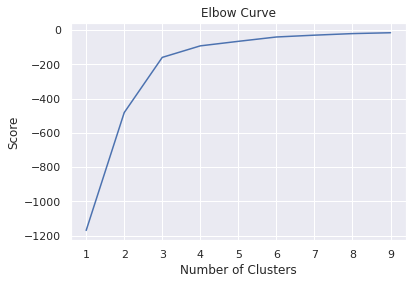

In [312]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dataset[['pick_lat']]
X_axis = dataset[['pick_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

In [313]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(pickup_location[pickup_location.columns[0:2]]) # Compute k-means clustering.
dataset['pick_location_cluster'] = kmeans.fit_predict(pickup_location[pickup_location.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(pickup_location[pickup_location.columns[0:2]]) # Labels of each point
print(dataset['pick_location_cluster'].value_counts())
dataset

0    21742
1     3554
2      452
Name: pick_location_cluster, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distance_val,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,pick_location_cluster
tripid,,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.00000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1.0,5.072065,2019,11,1,0,20,0,34,4,0
189125358,10.5,791.0,47.0,0.00000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1.0,3.151780,2019,11,1,0,56,1,9,4,0
189125719,10.5,1087.0,80.0,0.00000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1.0,6.302418,2019,11,1,1,8,1,26,4,0
189127273,10.5,598.0,271.0,15.66380,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1.0,0.862654,2019,11,1,2,27,2,37,4,0
189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1.0,8.148521,2019,11,1,3,34,3,51,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723.0,429.0,24.83332,3.0,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,NaN,3.938380,2020,3,16,21,28,21,56,0,0
222857785,10.5,1378.0,80.0,0.00000,125.0,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,NaN,7.525493,2020,3,16,21,59,22,22,0,0
222858416,10.5,418.0,56.0,3.28440,93.0,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,NaN,2.046036,2020,3,16,22,2,22,9,0,0


### drop clustering

In [314]:
dataset.columns[9:11]

Index(['drop_lat', 'drop_lon'], dtype='object')

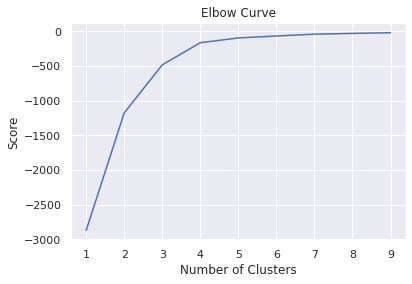

In [315]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dataset[['drop_lat']]
X_axis = dataset[['drop_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

In [316]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(drop_location[drop_location.columns[0:2]]) # Compute k-means clustering.
dataset['drop_location_cluster'] = kmeans.fit_predict(drop_location[drop_location.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(drop_location[drop_location.columns[0:2]]) # Labels of each point
print(dataset['drop_location_cluster'].value_counts())
dataset

1    22191
0     3556
2        1
Name: drop_location_cluster, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distance_val,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,pick_location_cluster,drop_location_cluster
tripid,,,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.00000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1.0,5.072065,2019,11,1,0,20,0,34,4,0,1
189125358,10.5,791.0,47.0,0.00000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1.0,3.151780,2019,11,1,0,56,1,9,4,0,1
189125719,10.5,1087.0,80.0,0.00000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1.0,6.302418,2019,11,1,1,8,1,26,4,0,1
189127273,10.5,598.0,271.0,15.66380,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1.0,0.862654,2019,11,1,2,27,2,37,4,0,1
189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1.0,8.148521,2019,11,1,3,34,3,51,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723.0,429.0,24.83332,3.0,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,NaN,3.938380,2020,3,16,21,28,21,56,0,0,1
222857785,10.5,1378.0,80.0,0.00000,125.0,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,NaN,7.525493,2020,3,16,21,59,22,22,0,0,1
222858416,10.5,418.0,56.0,3.28440,93.0,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,NaN,2.046036,2020,3,16,22,2,22,9,0,0,1


## Handle NaN

In [317]:
dataset[dataset['fare'].isnull()]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distance_val,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,pick_location_cluster,drop_location_cluster
tripid,,,,,,,,,,,,,,,,,,,,,,,,
189157607,10.5,2956.0,1686.0,97.4508,29.0,2019-11-01 08:40:00,2019-11-01 09:21:00,6.92109,79.8547,6.94120,79.8588,NaN,0.0,2.269660,2019,11,1,8,40,9,21,4,0,1
189164806,10.5,3549.0,2689.0,146.9854,69.0,2019-11-01 09:16:00,2019-11-01 09:29:00,6.91657,79.8593,6.89258,79.8554,NaN,0.0,2.687846,2019,11,1,9,16,9,29,4,0,1
189164831,NaN,NaN,NaN,NaN,NaN,2019-11-01 09:17:00,2019-11-01 09:25:00,7.27586,80.6136,7.28810,80.6319,NaN,0.0,2.432302,2019,11,1,9,17,9,25,4,1,0
190066074,NaN,NaN,NaN,NaN,NaN,2019-11-05 16:49:00,2019-11-05 17:01:00,7.48201,80.3580,7.50463,80.3510,NaN,0.0,2.618213,2019,11,5,16,49,17,1,1,1,0
190111701,NaN,NaN,NaN,NaN,NaN,2019-11-05 21:13:00,2019-11-05 21:15:00,7.03357,79.9238,7.03365,79.9238,NaN,0.0,0.008847,2019,11,5,21,13,21,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213449192,NaN,NaN,NaN,NaN,NaN,2020-01-30 22:52:00,2020-01-30 23:05:00,6.88183,79.8577,6.84729,79.8734,NaN,0.0,4.195463,2020,1,30,22,52,23,5,3,0,1
213510465,NaN,NaN,NaN,NaN,NaN,2020-01-31 10:03:00,2020-01-31 10:04:00,6.92600,79.8681,6.92596,79.8679,NaN,0.0,0.022541,2020,1,31,10,3,10,4,4,0,1
213538831,NaN,NaN,NaN,NaN,NaN,2020-01-31 11:53:00,2020-01-31 13:09:00,6.70807,79.9125,6.70815,79.9127,NaN,0.0,0.023817,2020,1,31,11,53,13,9,4,0,1


In [318]:
dataset.iloc[:,[0,1,2,3,4,11]]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare
tripid,,,,,,
189123628,10.5,834.0,56.0,0.00000,64.0,270.32
189125358,10.5,791.0,47.0,0.00000,134.0,197.85
189125719,10.5,1087.0,80.0,0.00000,61.0,301.64
189127273,10.5,598.0,271.0,15.66380,68.0,82.30
189128020,NaN,NaN,NaN,NaN,NaN,358.39
...,...,...,...,...,...,...
222856243,10.5,1723.0,429.0,24.83332,3.0,388.48
222857785,10.5,1378.0,80.0,0.00000,125.0,379.85
222858416,10.5,418.0,56.0,3.28440,93.0,112.79


In [319]:
imputer = KNNImputer(n_neighbors=5,weights='uniform')
dataset.iloc[:,[0,1,2,3,4,11]] = imputer.fit_transform(dataset.iloc[:,[0,1,2,3,4,11]])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [320]:
dataset.isna().sum()

additional_fare                 0
duration                        0
meter_waiting                   0
meter_waiting_fare              0
meter_waiting_till_pickup       0
pickup_time                     0
drop_time                       0
pick_lat                        0
pick_lon                        0
drop_lat                        0
drop_lon                        0
fare                            0
label                        8576
distance_val                    0
year                            0
month                           0
day                             0
pickup_hour                     0
pickup_min                      0
drop_hour                       0
drop_min                        0
weekday                         0
pick_location_cluster           0
drop_location_cluster           0
dtype: int64

In [321]:
dataset['additional_fare'].value_counts()

10.500000       22294
5.000000         1701
30.500000         538
40.500000         372
60.500000         277
12.836629         131
110.500000        112
21.000000         102
80.500000          38
25.000000          21
55.000000          21
11.000000          21
20.500000          20
0.000000           17
35.000000          17
85.500000          15
9.400000            9
14.500000           5
105.000000          5
81.000000           4
75.000000           3
8.300000            3
210.500000          2
16.500000           2
80.000000           2
221.000000          2
160.500000          1
12.500000           1
10.000000           1
91.500000           1
19.400000           1
61.000000           1
70.500000           1
450.820000          1
12.600000           1
35.400000           1
111.000000          1
36.500000           1
12795.030000        1
50.500000           1
Name: additional_fare, dtype: int64

## Categorize Continuous Classes

In [322]:

dataset['additional_fare'].value_counts()

10.500000       22294
5.000000         1701
30.500000         538
40.500000         372
60.500000         277
12.836629         131
110.500000        112
21.000000         102
80.500000          38
25.000000          21
55.000000          21
11.000000          21
20.500000          20
0.000000           17
35.000000          17
85.500000          15
9.400000            9
14.500000           5
105.000000          5
81.000000           4
75.000000           3
8.300000            3
210.500000          2
16.500000           2
80.000000           2
221.000000          2
160.500000          1
12.500000           1
10.000000           1
91.500000           1
19.400000           1
61.000000           1
70.500000           1
450.820000          1
12.600000           1
35.400000           1
111.000000          1
36.500000           1
12795.030000        1
50.500000           1
Name: additional_fare, dtype: int64

In [323]:
dataset['additional_fare'] = dataset.additional_fare.astype("category").cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [324]:
dataset['additional_fare'].value_counts()

5     22294
1      1701
16      538
20      372
23      277
9       131
33      112
14      102
28       38
22       21
6        21
15       21
13       20
17       17
0        17
30       15
3         9
32        5
10        5
29        4
26        3
2         3
37        2
27        2
36        2
11        2
8         1
12        1
18        1
34        1
4         1
19        1
35        1
39        1
21        1
25        1
38        1
7         1
24        1
31        1
Name: additional_fare, dtype: int64

In [325]:
dataset['year'].value_counts()

2020    14399
2019    11349
Name: year, dtype: int64

In [326]:
dataset['year'] = dataset.year.astype("category").cat.codes
dataset['year'].value_counts()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    14399
0    11349
Name: year, dtype: int64

In [327]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25748 entries, 189123628 to 222860703
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   additional_fare            25748 non-null  int8          
 1   duration                   25748 non-null  float64       
 2   meter_waiting              25748 non-null  float64       
 3   meter_waiting_fare         25748 non-null  float64       
 4   meter_waiting_till_pickup  25748 non-null  float64       
 5   pickup_time                25748 non-null  datetime64[ns]
 6   drop_time                  25748 non-null  datetime64[ns]
 7   pick_lat                   25748 non-null  float64       
 8   pick_lon                   25748 non-null  float64       
 9   drop_lat                   25748 non-null  float64       
 10  drop_lon                   25748 non-null  float64       
 11  fare                       25748 non-null  float64     

In [0]:

#Winter - 1 December	28 February
#Spring - 1 March	31 May
#Summer - 1 June	31 August
#Autumn - 1 September	30 November

#peak hours of traffic congestion  -  6a. m to 9.30a.m and 4.30p.m to 7.30p.m
#heavy traffic congestion - afternoon 1.30p.m to 2.30p.m also identify

#weekdays and weekends



In [0]:
season = ('Winter','Spring','Summer','Autumn')
#Spring - 0
#Summer - 1
#Autumn - 2
#Winter - 3
season_name_dict = {}
for ind in dataset.index:
  month =  dataset['month'][ind].astype(np.int64)
  if( 2 < dataset['month'][ind] < 6):
    season_name_dict[ind] = 0
  elif( 5 < dataset['month'][ind] < 9):
    season_name_dict[ind] = 1
  elif( 8 < dataset['month'][ind] < 12):
    season_name_dict[ind] = 2
  else:
    season_name_dict[ind] = 3
    


In [330]:
dataset['season'] = dataset.index.to_series().map(season_name_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [331]:
#weekday - 0 , weekend - 1
#in dataset - Monday is 0 and Sunday is 6.
day_cat = {}
for ind in dataset.index:
  day =  dataset['weekday'][ind].astype(np.int64)
  if(day==5 or day==6):
    day_cat[ind] = 1
  else:
    day_cat[ind] = 0

dataset['day_category'] = dataset.index.to_series().map(day_cat)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


## Feature visualization

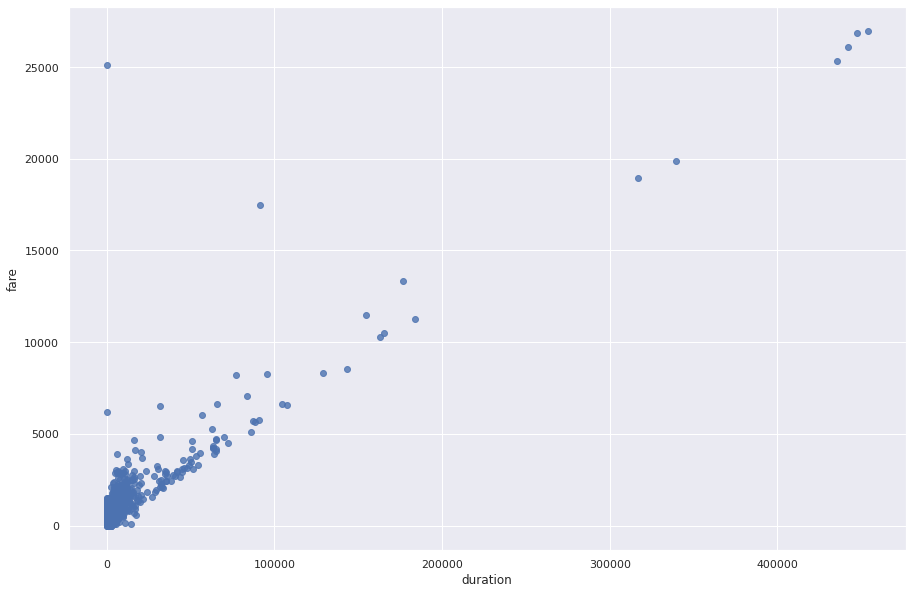

In [332]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.regplot(x="duration",y="fare",fit_reg=False,ci=None,truncate=True,data=dataset)



In [0]:
#dataset['mul_duration'] = dataset.duration * dataset.duration

#fig, ax = plt.subplots()
#fig.set_size_inches(15,10)
#ax = sns.regplot(x="mul_duration",y="fare",fit_reg=False,ci=None,truncate=True,data=dataset)



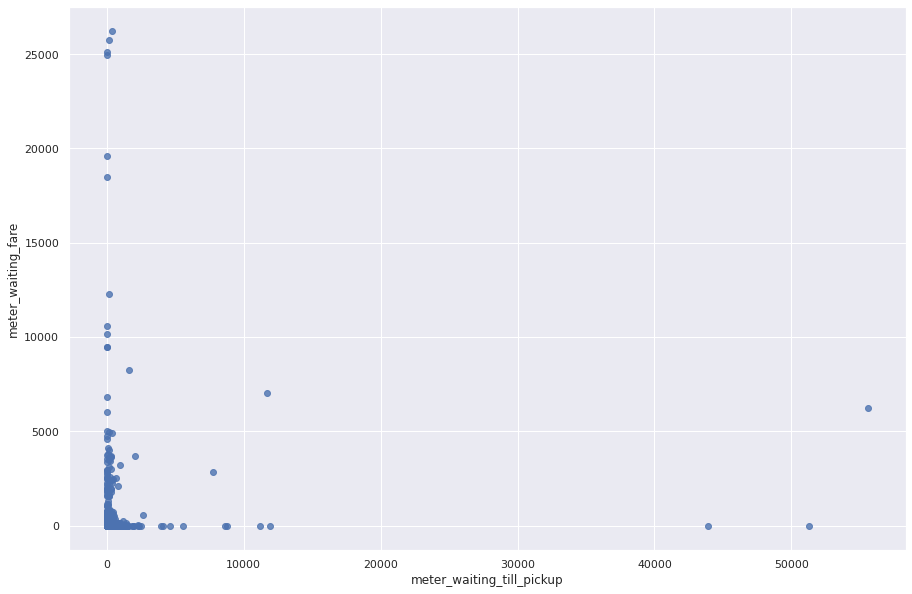

In [334]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.regplot(x="meter_waiting_till_pickup",y="meter_waiting_fare",fit_reg=False,ci=None,truncate=True,data=dataset)


In [0]:
#dataset['mul_meter_waiting'] = dataset.meter_waiting * dataset.meter_waiting
#fig, ax = plt.subplots()
#fig.set_size_inches(15,10)
#ax = sns.regplot(x="meter_waiting_fare",y="mul_meter_waiting",fit_reg=False,ci=None,truncate=True,data=dataset)

In [0]:
#fig = plt.figure(figsize=(6, 6))
#plt.scatter(x="duration",y="actual_fare",
          # linewidths=1, alpha=.7,
         #  edgecolor='k',
         #  s = 200,
          # c='year',data=dataset)
#plt.show()

## Split dataset to train and test

In [0]:
test = dataset.loc[213284604:222860703]
test = test.drop(['label'], axis=1)



In [0]:
train = dataset.loc[189123628:213817296]
convert_dict = {'label': 'int64'}
train = train.astype(convert_dict) 


In [339]:
dataset

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distance_val,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,pick_location_cluster,drop_location_cluster,season,day_category
tripid,,,,,,,,,,,,,,,,,,,,,,,,,,
189123628,5,834.0,56.0,0.00000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1.0,5.072065,0,11,1,0,20,0,34,4,0,1,2,0
189125358,5,791.0,47.0,0.00000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1.0,3.151780,0,11,1,0,56,1,9,4,0,1,2,0
189125719,5,1087.0,80.0,0.00000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1.0,6.302418,0,11,1,1,8,1,26,4,0,1,2,0
189127273,5,598.0,271.0,15.66380,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1.0,0.862654,0,11,1,2,27,2,37,4,0,1,2,0
189128020,5,1713.6,373.8,10.89794,29.0,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1.0,8.148521,0,11,1,3,34,3,51,4,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,5,1723.0,429.0,24.83332,3.0,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,NaN,3.938380,1,3,16,21,28,21,56,0,0,1,0,0
222857785,5,1378.0,80.0,0.00000,125.0,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,NaN,7.525493,1,3,16,21,59,22,22,0,0,1,0,0
222858416,5,418.0,56.0,3.28440,93.0,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,NaN,2.046036,1,3,16,22,2,22,9,0,0,1,0,0


In [340]:
dataset

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distance_val,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,pick_location_cluster,drop_location_cluster,season,day_category
tripid,,,,,,,,,,,,,,,,,,,,,,,,,,
189123628,5,834.0,56.0,0.00000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1.0,5.072065,0,11,1,0,20,0,34,4,0,1,2,0
189125358,5,791.0,47.0,0.00000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1.0,3.151780,0,11,1,0,56,1,9,4,0,1,2,0
189125719,5,1087.0,80.0,0.00000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1.0,6.302418,0,11,1,1,8,1,26,4,0,1,2,0
189127273,5,598.0,271.0,15.66380,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1.0,0.862654,0,11,1,2,27,2,37,4,0,1,2,0
189128020,5,1713.6,373.8,10.89794,29.0,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1.0,8.148521,0,11,1,3,34,3,51,4,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,5,1723.0,429.0,24.83332,3.0,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,NaN,3.938380,1,3,16,21,28,21,56,0,0,1,0,0
222857785,5,1378.0,80.0,0.00000,125.0,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,NaN,7.525493,1,3,16,21,59,22,22,0,0,1,0,0
222858416,5,418.0,56.0,3.28440,93.0,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,NaN,2.046036,1,3,16,22,2,22,9,0,0,1,0,0


In [341]:
dataset.columns

Index(['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'pickup_time', 'drop_time', 'pick_lat',
       'pick_lon', 'drop_lat', 'drop_lon', 'fare', 'label', 'distance_val',
       'year', 'month', 'day', 'pickup_hour', 'pickup_min', 'drop_hour',
       'drop_min', 'weekday', 'pick_location_cluster', 'drop_location_cluster',
       'season', 'day_category'],
      dtype='object')

## Setup data to train model

In [342]:
train_features = train[['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'pick_lat',
       'pick_lon', 'drop_lat', 'drop_lon', 'fare', 'distance_val',
       'year', 'month', 'day', 'pickup_hour', 'pickup_min', 'drop_hour',
       'drop_min', 'weekday', 'pick_location_cluster', 'drop_location_cluster',
       'season', 'day_category']]
print(train_features.info())
train_features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            17172 non-null  int8   
 1   duration                   17172 non-null  float64
 2   meter_waiting              17172 non-null  float64
 3   meter_waiting_fare         17172 non-null  float64
 4   meter_waiting_till_pickup  17172 non-null  float64
 5   pick_lat                   17172 non-null  float64
 6   pick_lon                   17172 non-null  float64
 7   drop_lat                   17172 non-null  float64
 8   drop_lon                   17172 non-null  float64
 9   fare                       17172 non-null  float64
 10  distance_val               17172 non-null  float64
 11  year                       17172 non-null  int8   
 12  month                      17172 non-null  int64  
 13  day                        17172 n

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance_val,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,pick_location_cluster,drop_location_cluster,season,day_category
tripid,,,,,,,,,,,,,,,,,,,,,,,
189123628,5,834.0,56.0,0.00000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,5.072065,0,11,1,0,20,0,34,4,0,1,2,0
189125358,5,791.0,47.0,0.00000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,3.151780,0,11,1,0,56,1,9,4,0,1,2,0
189125719,5,1087.0,80.0,0.00000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,6.302418,0,11,1,1,8,1,26,4,0,1,2,0
189127273,5,598.0,271.0,15.66380,68.0,6.92570,79.8895,6.92748,79.8971,82.30,0.862654,0,11,1,2,27,2,37,4,0,1,2,0
189128020,5,1713.6,373.8,10.89794,29.0,6.87441,79.8615,6.84478,79.9290,358.39,8.148521,0,11,1,3,34,3,51,4,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,5,838.0,93.0,5.42190,451.0,7.29073,80.6367,7.28891,80.6557,198.26,2.107720,1,1,31,22,7,22,21,4,1,0,3,0
213812756,5,2151.0,428.0,0.00000,39.0,6.90569,79.8516,6.95089,79.9389,581.23,10.865770,1,1,31,23,7,23,43,4,0,1,3,0
213813930,5,263.0,9.0,0.00000,110.0,7.09210,79.9000,7.10135,79.9017,76.20,1.040065,1,1,31,23,21,23,25,4,0,1,3,0


In [343]:
train_lable = train[['label']]
print(train_lable.info())
train_lable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   17172 non-null  int64
dtypes: int64(1)
memory usage: 268.3 KB
None


,label
tripid,
189123628,1
189125358,1
189125719,1
189127273,1
189128020,1
...,...
213803193,1
213812756,1
213813930,1


In [344]:
test_features = test[['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'pick_lat',
       'pick_lon', 'drop_lat', 'drop_lon', 'fare', 'distance_val',
       'year', 'month', 'day', 'pickup_hour', 'pickup_min', 'drop_hour',
       'drop_min', 'weekday', 'pick_location_cluster', 'drop_location_cluster',
       'season', 'day_category']]

print(test_features.info())
test_features


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            8576 non-null   int8   
 1   duration                   8576 non-null   float64
 2   meter_waiting              8576 non-null   float64
 3   meter_waiting_fare         8576 non-null   float64
 4   meter_waiting_till_pickup  8576 non-null   float64
 5   pick_lat                   8576 non-null   float64
 6   pick_lon                   8576 non-null   float64
 7   drop_lat                   8576 non-null   float64
 8   drop_lon                   8576 non-null   float64
 9   fare                       8576 non-null   float64
 10  distance_val               8576 non-null   float64
 11  year                       8576 non-null   int8   
 12  month                      8576 non-null   int64  
 13  day                        8576 non

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance_val,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,pick_location_cluster,drop_location_cluster,season,day_category
tripid,,,,,,,,,,,,,,,,,,,,,,,
213284604,5,924.0,42.0,2.44860,148.0,6.83454,79.8750,6.77490,79.8840,289.27,6.670189,1,2,1,0,38,0,53,5,0,1,3,1
213286352,5,4249.0,20.0,0.00000,91.0,6.91168,79.8723,6.55091,79.9706,1912.70,41.351053,1,2,1,1,2,2,13,5,0,1,3,1
213293973,5,1552.0,255.0,2.65880,23.0,6.92145,79.8478,6.90539,79.8989,394.00,5.920044,1,2,1,5,2,5,28,5,0,1,3,1
213294622,5,462.0,16.0,0.00000,198.0,6.77433,79.9416,6.80401,79.9407,154.32,3.283813,1,2,1,5,30,5,38,5,0,1,3,1
213298687,5,814.0,392.0,12.36920,69.0,6.97968,79.9130,6.98875,79.8914,147.47,2.588982,1,2,1,7,0,7,14,5,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,5,1723.0,429.0,24.83332,3.0,6.85103,79.9567,6.85588,79.9214,388.48,3.938380,1,3,16,21,28,21,56,0,0,1,0,0
222857785,5,1378.0,80.0,0.00000,125.0,6.91293,79.9656,6.92112,79.8980,379.85,7.525493,1,3,16,21,59,22,22,0,0,1,0,0
222858416,5,418.0,56.0,3.28440,93.0,6.85718,79.9081,6.83868,79.9083,112.79,2.046036,1,3,16,22,2,22,9,0,0,1,0,0


## Feature Importance

In [349]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply SelectKBest class to extract top features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train_features, train_lable)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_features.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(25, 'Score'))

                        Specs         Score
2               meter_waiting  1.857011e+07
1                    duration  7.718370e+06
3          meter_waiting_fare  1.126869e+06
9                        fare  6.192472e+05
4   meter_waiting_till_pickup  3.432444e+04
0             additional_fare  9.700958e+02
12                      month  7.550695e+01
11                       year  2.094410e+01
13                        day  1.888808e+01
19      pick_location_cluster  1.119993e+01
21                     season  8.598369e+00
15                 pickup_min  4.348388e+00
20      drop_location_cluster  3.663334e+00
22               day_category  3.224447e+00
18                    weekday  8.598805e-01
10               distance_val  6.732476e-01
14                pickup_hour  5.686638e-01
16                  drop_hour  2.833485e-01
17                   drop_min  2.019520e-01
5                    pick_lat  9.098007e-02
7                    drop_lat  5.577358e-02
8                    drop_lon  2

## CAT Boost

In [350]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier, cv

convert_dict2 = {'additional_fare': 'int64'}
train_features = train_features.astype(convert_dict2) 
convert_dict2 = {'additional_fare': 'int64'}
test_features = test_features.astype(convert_dict2) 





     |████████████████████████████████| 64.7MB 68kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [351]:
rnd_state = 42




# make train val split to try out-of-the-box
X_train, X_val, y_train, y_val = train_test_split(train_features, train_lable, test_size=0.2, random_state=rnd_state)

categorical_features_indices = np.where(train_features.dtypes != np.float)[0]
clf = CatBoostClassifier(random_seed=rnd_state, custom_metric='Accuracy')
clf.fit(X_train, y_train, cat_features=categorical_features_indices)
clf.score(X_val, y_val)


Learning rate set to 0.031537
0:	learn: 0.6577387	total: 92.3ms	remaining: 1m 32s
1:	learn: 0.6301284	total: 132ms	remaining: 1m 5s
2:	learn: 0.6048192	total: 164ms	remaining: 54.6s
3:	learn: 0.5823334	total: 184ms	remaining: 45.9s
4:	learn: 0.5553810	total: 233ms	remaining: 46.3s
5:	learn: 0.5322215	total: 257ms	remaining: 42.6s
6:	learn: 0.5156514	total: 271ms	remaining: 38.4s
7:	learn: 0.4911107	total: 313ms	remaining: 38.9s
8:	learn: 0.4736564	total: 357ms	remaining: 39.3s
9:	learn: 0.4580098	total: 394ms	remaining: 39s
10:	learn: 0.4397303	total: 442ms	remaining: 39.7s
11:	learn: 0.4266568	total: 476ms	remaining: 39.2s
12:	learn: 0.4149167	total: 505ms	remaining: 38.3s
13:	learn: 0.4038774	total: 525ms	remaining: 37s
14:	learn: 0.3926616	total: 561ms	remaining: 36.9s
15:	learn: 0.3803836	total: 604ms	remaining: 37.2s
16:	learn: 0.3705074	total: 649ms	remaining: 37.5s
17:	learn: 0.3596610	total: 693ms	remaining: 37.8s
18:	learn: 0.3520240	total: 731ms	remaining: 37.7s
19:	learn: 0.

0.9525473071324599

In [352]:
# Submission 1: catboost submission with all training data and early stopping on Accuracy

clf_od = CatBoostClassifier(random_seed=rnd_state, od_type='Iter', od_wait=20, eval_metric='Accuracy')
clf_od.fit(train_features, train_lable, cat_features=categorical_features_indices)


prediction = clf_od.predict(test_features).astype('int')

Learning rate set to 0.03469
0:	learn: 0.9174819	total: 56.2ms	remaining: 56.2s
1:	learn: 0.9114256	total: 75.3ms	remaining: 37.6s
2:	learn: 0.9023410	total: 87.7ms	remaining: 29.1s
3:	learn: 0.9116003	total: 130ms	remaining: 32.4s
4:	learn: 0.9117167	total: 178ms	remaining: 35.4s
5:	learn: 0.9134055	total: 237ms	remaining: 39.2s
6:	learn: 0.9152108	total: 284ms	remaining: 40.2s
7:	learn: 0.9137549	total: 329ms	remaining: 40.8s
8:	learn: 0.9122991	total: 358ms	remaining: 39.4s
9:	learn: 0.9113091	total: 384ms	remaining: 38s
10:	learn: 0.9178314	total: 436ms	remaining: 39.2s
11:	learn: 0.9198696	total: 485ms	remaining: 39.9s
12:	learn: 0.9220242	total: 535ms	remaining: 40.6s
13:	learn: 0.9210925	total: 581ms	remaining: 40.9s
14:	learn: 0.9217913	total: 632ms	remaining: 41.5s
15:	learn: 0.9219078	total: 689ms	remaining: 42.4s
16:	learn: 0.9215001	total: 734ms	remaining: 42.5s
17:	learn: 0.9208013	total: 745ms	remaining: 40.7s
18:	learn: 0.9206848	total: 786ms	remaining: 40.6s
19:	learn: 

In [353]:

index=[]
for ind in test_features.index:
  index.append(ind)

test_features['tripid'] = index

submission = pd.DataFrame({
        "tripid": test_features["tripid"],
        "prediction": prediction
    })
submission = submission.drop(['tripid'],1)
test_features = test_features.drop(['tripid'],1)
print(submission['prediction'].value_counts())
submission

1    8252
0     324
Name: prediction, dtype: int64


,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


In [354]:
DATA_PATH = '/content/drive/My Drive/Data Sets/ML data/output'
sub_path = DATA_PATH + 'sub10_newfeatures_CATBOOST.csv'
submission.to_csv(sub_path, index=True)
print('Completed!')

Completed!


## Model

In [0]:
#XGBoost for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from statistics import *
from numpy import mean

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

counter = Counter(train_lable['label'])
print(counter)

Counter({1: 15495, 0: 1677})


In [0]:
#The scale_pos_weight value is used to scale the gradient for the positive class.
#scale_pos_weight = total_negative_examples / total_positive_examples
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 0.108


In [0]:
tf = train_features.to_numpy()
tl = train_lable.to_numpy()

In [0]:
# define grid
model = XGBClassifier()
weights = [0.35,0.355,0.358,0.359, 0.3605,0.3609,0.3615, 0.3618, 0.362]
param_grid = dict(scale_pos_weight=weights)

In [0]:
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
#grid_result = grid.fit(tf, tl)
# report the best configuration
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
train_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,pick_location_cluster,drop_location_cluster,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,
189123628,5,834.0,56.0,0.00000,64.0,270.32,0,0,2019,11,0,20,0,34,5,5.072065
189125358,5,791.0,47.0,0.00000,134.0,197.85,0,0,2019,11,0,56,1,9,5,3.151780
189125719,5,1087.0,80.0,0.00000,61.0,301.64,0,0,2019,11,1,8,1,26,5,6.302418
189127273,5,598.0,271.0,15.66380,68.0,82.30,0,0,2019,11,2,27,2,37,5,0.862654
189128020,5,1713.6,373.8,10.89794,29.0,358.39,0,0,2019,11,3,34,3,51,5,8.148521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,5,838.0,93.0,5.42190,451.0,198.26,1,2,2020,1,22,7,22,21,5,2.107720
213812756,5,2151.0,428.0,0.00000,39.0,581.23,0,0,2020,1,23,7,23,43,5,10.865770
213813930,5,263.0,9.0,0.00000,110.0,76.20,0,0,2020,1,23,21,23,25,5,1.040065


In [0]:
#print(train_features['additional_fare'].value_counts())
#print(test_features['additional_fare'].value_counts())

In [0]:
convert_dict2 = {'additional_fare': 'int64'}
train_features = train_features.astype(convert_dict2) 
convert_dict2 = {'additional_fare': 'int64'}
test_features = test_features.astype(convert_dict2) 

In [0]:
print(train_features.info())
print(test_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            17172 non-null  int64  
 1   duration                   17172 non-null  float64
 2   meter_waiting              17172 non-null  float64
 3   meter_waiting_fare         17172 non-null  float64
 4   meter_waiting_till_pickup  17172 non-null  float64
 5   fare                       17172 non-null  float64
 6   pick_location_cluster      17172 non-null  int32  
 7   drop_location_cluster      17172 non-null  int32  
 8   year                       17172 non-null  int64  
 9   month                      17172 non-null  int64  
 10  pickup_hour                17172 non-null  int64  
 11  pickup_min                 17172 non-null  int64  
 12  drop_hour                  17172 non-null  int64  
 13  drop_min                   17172 n

In [0]:
train_lable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   17172 non-null  int64
dtypes: int64(1)
memory usage: 268.3 KB


## Cal Accuracy to check overfitting

In [0]:
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(train_features, train_lable,
test_size=0.2, random_state=123)

xg_cl = xgb.XGBClassifier(objective='binary:logistic',
n_estimators=10, seed=123)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
preds=preds.reshape(3435,1)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.930131


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#xg_cls = xgb.XGBClassifier(objective='binary:logistic',
#n_estimators=10, seed=123)
#xg_cls.fit(train_features, train_lable)
#pred_s = xg_cls.predict(test_features)


In [0]:
#index=[]
#for ind in test_features.index:
 # index.append(ind)

#test_features['tripid'] = index

#submission = pd.DataFrame({
 #       "tripid": test_features["tripid"],
  #      "prediction": pred_s
   # })
#submission = submission.drop(['tripid'],1)
#test_features = test_features.drop(['tripid'],1)
#print(submission['prediction'].value_counts())
#submission

## Save model 1

In [0]:
#DATA_PATH = '/content/drive/My Drive/Data Sets/ML data/output'
#sub_path = DATA_PATH + 'sub4_1st_XGBOOST.csv'
#submission.to_csv(sub_path, index=True)
#print('Completed!')

score - 0.96709

## cross validation

In [0]:

churn_dmatrix = xgb.DMatrix(data=train_features,
label=train_lable)
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=4,
num_boost_round=10, metrics="error", as_pandas=True)
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))


Accuracy: 0.939436


## Train

In [0]:
xgb_model = XGBClassifier(scale_pos_weight=0.35)
# fit the model with the training data
xgb_model.fit(train_features,train_lable)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.35, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predict_test = xgb_model.predict(test_features)

In [0]:
index=[]
for ind in test_features.index:
  index.append(ind)

test_features['tripid'] = index

sub = pd.DataFrame({
        "tripid": test_features["tripid"],
        "prediction": predict_test
    })
sub = sub.drop(['tripid'],1)
test_features = test_features.drop(['tripid'],1)
print(sub['prediction'].value_counts())
sub

1    8184
0     392
Name: prediction, dtype: int64


,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


In [0]:
DATA_PATH = '/content/drive/My Drive/Data Sets/ML data/output'
sub_path = DATA_PATH + 'sub8_imputed_CATOOST.csv'
sub.to_csv(sub_path, index=True)
print('Completed!')

Completed!


score - 0.97551

## **normalize**

In [0]:
#from sklearn import preprocessing

# Set charts to view inline
#%matplotlib inline

In [0]:
#x = train[['duration']].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
##df_normalized  = pd.DataFrame(x_scaled)
#df_normalized 

In [0]:
#df_normalized9=((train["distance_val"]-train["distance_val"].min())/(train["distance_val"].max()-train["distance_val"].min()))
#print(train["distance_val"].max())
#print(test["distance_val"].max())

**test normalization**

In [0]:
#df_normalized5=((test["duration"]-test["duration"].min())/(test["duration"].max()-test["duration"].min()))*100
#test['duration'] = df_normalized5

In [0]:
#df_normalized6=((test["meter_waiting"]-test["meter_waiting"].min())/(test["meter_waiting"].max()-test["meter_waiting"].min()))*400
#test['meter_waiting'] = df_normalized6

In [0]:
#df_normalized7=((test["meter_waiting_till_pickup"]-test["meter_waiting_till_pickup"].min())/(test["meter_waiting_till_pickup"].max()-test["meter_waiting_till_pickup"].min()))*200
#test['meter_waiting_till_pickup'] = df_normalized7

In [0]:
#df_normalized10=((test["fare"]-test["fare"].min())/(test["fare"].max()-test["fare"].min()))*50
#test['fare'] = df_normalized10

In [0]:
#df_normalized11=((test["distance_val"]-test["distance_val"].min())/(test["distance_val"].max()-test["distance_val"].min()))
#df_normalized11